# **Del texto al dato: cómo entienden las máquinas el lenguaje con Python (reseñas de restaurantes)**

Las máquinas no entienden el lenguaje como los humanos, sino que **detectan patrones, relaciones y señales numéricas, con los que hacen cálculos más o menos complejos y nos dan unos resultados / diagnósticos basados en probabilidades**.  
En este taller veremos paso a paso cómo convertir texto en datos, cómo visualizarlo y cómo analizar su sentimiento, como detectar las palabras más usadas y las más influyentes; a su vez, un conjunto de datos con textos y fechas nos podría ayudar a detectar y visualizar tendencias conversacionales o de opiniones a lo largo del tiempo.

Este archivo contiene textos cortos de estilo "reseñas" de restaurantes. Además, el código funcionará igual con opiniones, artículos, comentarios de redes sociales, literatura, cartas, encuestas, letras de canciones, conversaciones, etc.

Una vez descargada su copia del archivo, el usuario es libre de explorar con sus propios textos, modificando así los texto que encontrará entre comillas (como objetos de tipo *string*) para ver las diferencias de resultados.

Usaremos herramientas ampliamente utilizadas en el análisis de lenguaje: **NLTK**, **VADER**, **spaCy**, **TextBlob**, **matplotlib** y **WordCloud**.

https://github.com/cristinasprogrammingadventure/PyDay-2025_workshop-Del-Texto-al-Dato_NLP

## ¿Qué vamos a aprender?

Aprenderemos cómo convertir texto en datos medibles, cómo analizar palabras, cómo extraer información útil y cómo los algoritmos estiman el tono o contenido de un texto. Estas son las tareas que realizaremos:

1. Cargar texto y limpiarlo.  
2. Tokenización: convertir texto en palabras individuales.  
3. Eliminar puntuación y stopwords.  
4. Obtener frecuencias de palabras y ver las más comunes.  
5. Crear nubes de palabras.  
6. Hacer análisis de sentimiento (TextBlob, VADER, pysentimiento, etc)
7. Visualizar sentimientos con gráficos.  
8. Comparación entre textos.  
9. Conclusiones y limitaciones del análisis automático.



## Textos y librerías

Algunas de las librerías específicas que usaremos:

- **NLTK**: tokenización y stopwords.  
- **TextBlob**: análisis de sentimiento simple.  
- **VADER**: análisis de sentimiento optimizado para redes sociales.  
- **Matplotlib / Seaborn**: visualización de polaridades, sentimentos y el peso de las palabras   
  - **WordCloud**: nubes de palabras.
  - **Radar charts de palabras**

A continuación cargaremos las librerías y empezaremos con los textos.

## **Primer bloque de código didáctico (carga de textos + tokenización)***


In [ ]:
# Librerías básicas
import re
import string
from collections import Counter

# Para análisis de sentimiento
from textblob import TextBlob

# Para visualización
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Descargar recursos necesarios de NLTK
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download("punkt_tab") # para tokenización en español
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords_es = stopwords.words("spanish") # Stopwords en español





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### **Textos a analizar (creando un objeto)**

- Escribirlos directamente entre comillas
- Cargarlos desde un fichero .txt, .csv
- Cargarlos desde una URL
- Cargarlo haciendo *web scraping*

In [ ]:
# Texto escrito directamente entre comillas

texto1 = """
Volveré ! El servicio es excelente y la comida, deliciosa. El ambiente es agradable. El personal muy atento. Excelente ubicación.
Personalmente, me agrada mucho. Sin duda volveré pronto.
"""

texto2 = """
La espera fue larga y la comida llegó fría. El servicio fue descuidado
y la experiencia en general bastante decepcionante.
"""


### **Tokenización básica**

In [ ]:
def limpiar_y_tokenizar(texto):
    texto = texto.lower()
    texto = re.sub(r"[^\wáéíóúüñ]+", " ", texto)
    tokens = word_tokenize(texto, language="spanish")
    tokens = [t for t in tokens if t not in stopwords_es and t not in string.punctuation]
    return tokens

tokens1 = limpiar_y_tokenizar(texto1)
tokens2 = limpiar_y_tokenizar(texto2)

tokens1, tokens2

(['volveré',
  'servicio',
  'excelente',
  'comida',
  'deliciosa',
  'ambiente',
  'agradable',
  'personal',
  'atento',
  'excelente',
  'ubicación',
  'personalmente',
  'agrada',
  'duda',
  'volveré',
  'pronto'],
 ['espera',
  'larga',
  'comida',
  'llegó',
  'fría',
  'servicio',
  'descuidado',
  'experiencia',
  'general',
  'bastante',
  'decepcionante'])

### Obtener la **frecuencia** de cada *palabra / token* con el ***Counter***



In [ ]:
# si no se hizo en el prncipio, se debería escribir ahora el código -> "from collections import Counter"
# Llamamos al contador de palabras 'Counter'

def frecuencia_palabras(tokens):
    return Counter(tokens)

freq1 = frecuencia_palabras(tokens1)
freq2 = frecuencia_palabras(tokens2)

freq1.most_common(10), freq2.most_common(10)


([('volveré', 2),
  ('excelente', 2),
  ('servicio', 1),
  ('comida', 1),
  ('deliciosa', 1),
  ('ambiente', 1),
  ('agradable', 1),
  ('personal', 1),
  ('atento', 1),
  ('ubicación', 1)],
 [('espera', 1),
  ('larga', 1),
  ('comida', 1),
  ('llegó', 1),
  ('fría', 1),
  ('servicio', 1),
  ('descuidado', 1),
  ('experiencia', 1),
  ('general', 1),
  ('bastante', 1)])

### Visualización simple de **frecuencias**

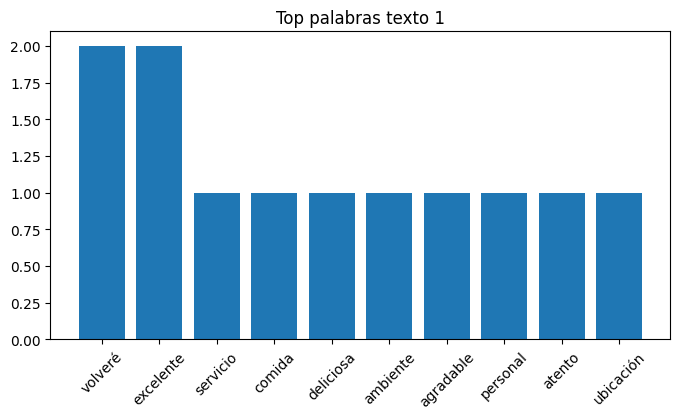

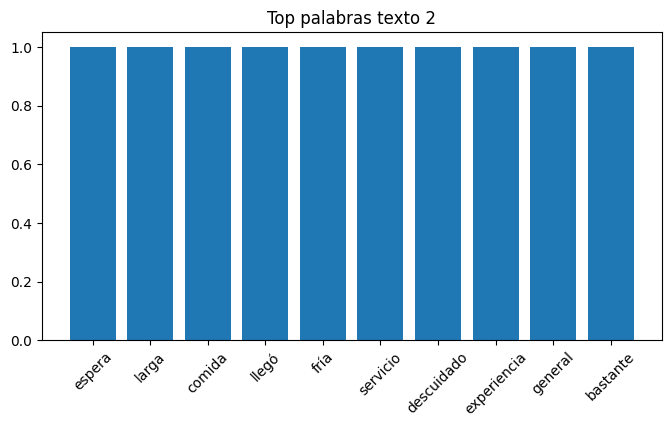

In [ ]:
def plot_frecuencias(counter, titulo):
    palabras, frecs = zip(*counter.most_common(10))
    plt.figure(figsize=(8,4))
    plt.bar(palabras, frecs)
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.show()

plot_frecuencias(freq1, "Top palabras texto 1")
plot_frecuencias(freq2, "Top palabras texto 2")


### ***WordCloud*** para cada texto

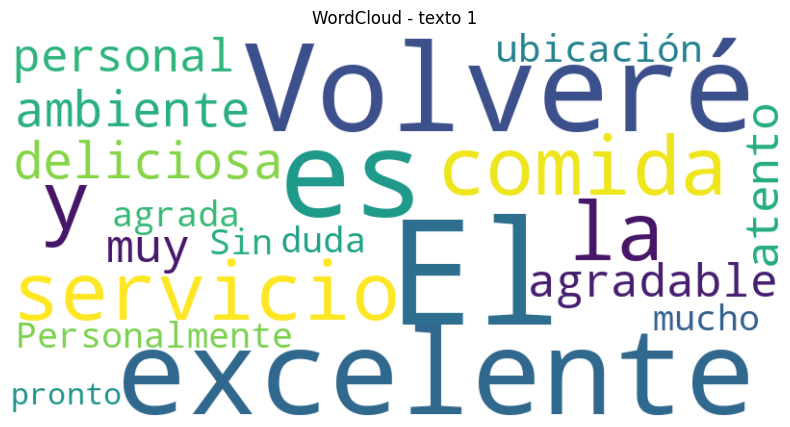

In [ ]:
def generar_wordcloud(texto, titulo):
    wc = WordCloud(width=800, height=400, background_color="white").generate(texto)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo)
    plt.show()

generar_wordcloud(texto1, "WordCloud - texto 1")



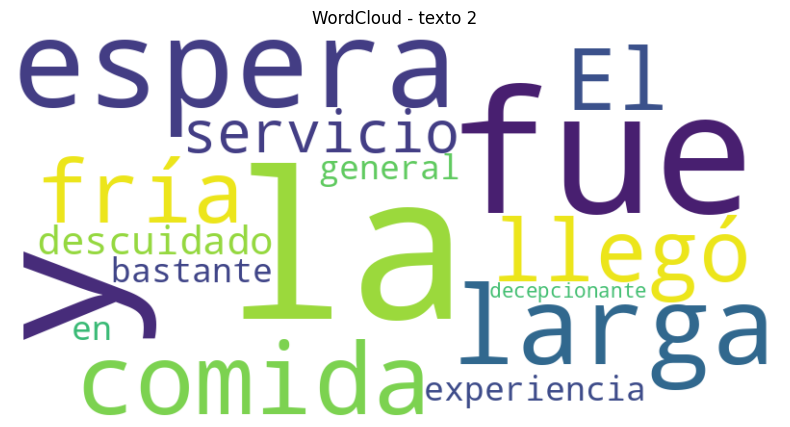

In [ ]:
generar_wordcloud(texto2, "WordCloud - texto 2")

**Observaciones:**

- WordCloud **tiene stopwords** porque estás usando el **texto original**

- El WordCloud no sabe qué es una stopword, a menos que se las pasemos nosotros.

**Solución:**

- crear WordCloud sin stopwords, así:

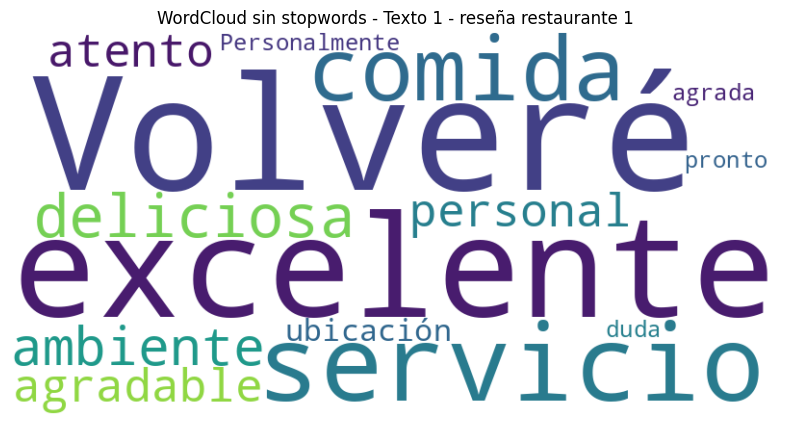

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords_wc = set(STOPWORDS) | set(stopwords_es)

def generar_wordcloud_sin_stopwords(texto, titulo):
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stopwords_wc
    ).generate(texto)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo)
    plt.show()

generar_wordcloud_sin_stopwords(texto1, "WordCloud sin stopwords - Texto 1 - reseña restaurante 1")



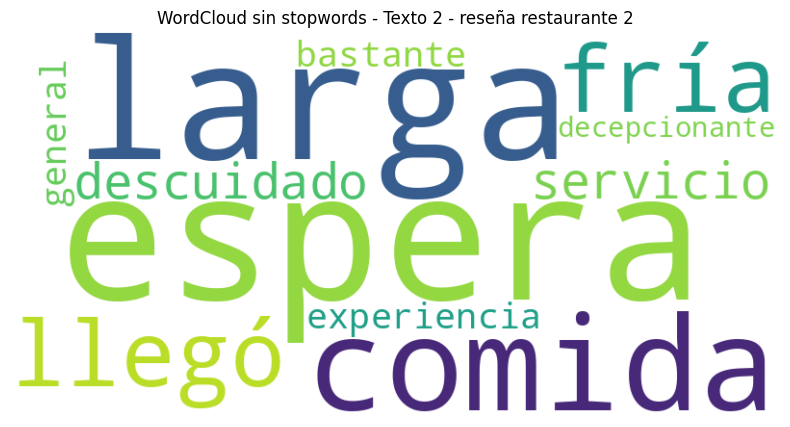

In [ ]:
generar_wordcloud_sin_stopwords(texto2, "WordCloud sin stopwords - Texto 2 - reseña restaurante 2")

### Análisis de sentimiento con ***TextBlob***

In [ ]:
# Polarity - Subjectivity (falta poner)

def sentimiento_textblob(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

print("Sentimiento texto 1:", sentimiento_textblob(texto1))
print("Sentimiento texto 2:", sentimiento_textblob(texto2))


Sentimiento texto 1: 0.0
Sentimiento texto 2: 0.05000000000000002


**Observaciones:**

- TextBlob no sirve para español.

- TextBlob solo tiene un modelo de sentimiento para inglés y devuelve valores a veces 'absurdos'

### Análisis de sentimiento con ***VADER***

In [ ]:
sia = SentimentIntensityAnalyzer()

sent1 = sia.polarity_scores(texto1)
sent2 = sia.polarity_scores(texto2)

sent1, sent2


({'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.5983},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0})

### **Visualización del sentimiento (barras)**

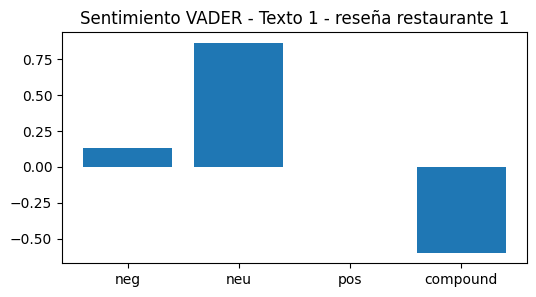

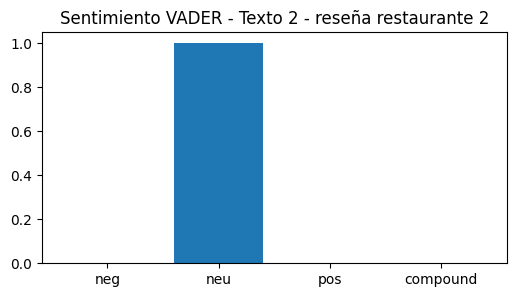

In [ ]:
def plot_sentiment_vader(scores, titulo):
    labels = list(scores.keys())
    vals = list(scores.values())
    plt.figure(figsize=(6,3))
    plt.bar(labels, vals)
    plt.title(titulo)
    plt.show()

plot_sentiment_vader(sent1, "Sentimiento VADER - Texto 1 - reseña restaurante 1")
plot_sentiment_vader(sent2, "Sentimiento VADER - Texto 2 - reseña restaurante 2")


**Observaciones: reseñas de restaurantes**

- texto positivo (opinión ++ sobre restaurante) → compound -0.55   (resultado 'NEGATIVO' -> incorrecto)

- texto negativo  (opinión -- sobre restaurante) → compound 0.0     (resultado 'NEUTRO' -> incorrecto)

**Causas:**

- VADER no funciona bien en español ya que está diseñado para inglés.
- El lexicón contiene ~7.500 palabras solo con carga emocional.
- Palabras neutras y muchas subjetivas NO aparecen.
- En español casi nada coincide, por eso da NO ENCONTRADA.

In [ ]:
# CÓDIGO PARA VER PUNTUACIÓN PALABRA POR PALABRA con VADER

analyzer = SentimentIntensityAnalyzer()

palabras = [
    "excelente", "excellent", "larga", "long",
    "servicio", "service", "atento", "attentive",
    "terrible", "deliciosa", "delicious", "delic",
    "mala", "bad", "fría", "cold",
    "decepcionante", "disappointing",
    "pero", "but"
]

for p in palabras:
    if p in analyzer.lexicon:
        print(f"{p:15} → {analyzer.lexicon[p]}")
    else:
        print(f"{p:15} → NO ENCONTRADA EN EL LEXICON")



excelente       → NO ENCONTRADA EN EL LEXICON
excellent       → 2.7
larga           → NO ENCONTRADA EN EL LEXICON
long            → NO ENCONTRADA EN EL LEXICON
servicio        → NO ENCONTRADA EN EL LEXICON
service         → NO ENCONTRADA EN EL LEXICON
atento          → NO ENCONTRADA EN EL LEXICON
attentive       → NO ENCONTRADA EN EL LEXICON
terrible        → -2.1
deliciosa       → NO ENCONTRADA EN EL LEXICON
delicious       → 2.7
delic           → NO ENCONTRADA EN EL LEXICON
mala            → NO ENCONTRADA EN EL LEXICON
bad             → -2.5
fría            → NO ENCONTRADA EN EL LEXICON
cold            → NO ENCONTRADA EN EL LEXICON
decepcionante   → NO ENCONTRADA EN EL LEXICON
disappointing   → -2.2
pero            → NO ENCONTRADA EN EL LEXICON
but             → NO ENCONTRADA EN EL LEXICON


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
[p for p in analyzer.lexicon if "delic" in p]


['delicate',
 'delicately',
 'delicates',
 'delicatessen',
 'delicatessens',
 'delicious',
 'deliciously',
 'deliciousness']

In [ ]:
list(analyzer.lexicon.items())[:100]


[('$:', -1.5),
 ('%)', -0.4),
 ('%-)', -1.5),
 ('&-:', -0.4),
 ('&:', -0.7),
 ("( '}{' )", 1.6),
 ('(%', -0.9),
 ("('-:", 2.2),
 ("(':", 2.3),
 ('((-:', 2.1),
 ('(*', 1.1),
 ('(-%', -0.7),
 ('(-*', 1.3),
 ('(-:', 1.6),
 ('(-:0', 2.8),
 ('(-:<', -0.4),
 ('(-:o', 1.5),
 ('(-:O', 1.5),
 ('(-:{', -0.1),
 ('(-:|>*', 1.9),
 ('(-;', 1.3),
 ('(-;|', 2.1),
 ('(8', 2.6),
 ('(:', 2.2),
 ('(:0', 2.4),
 ('(:<', -0.2),
 ('(:o', 2.5),
 ('(:O', 2.5),
 ('(;', 1.1),
 ('(;<', 0.3),
 ('(=', 2.2),
 ('(?:', 2.1),
 ('(^:', 1.5),
 ('(^;', 1.5),
 ('(^;0', 2.0),
 ('(^;o', 1.9),
 ('(o:', 1.6),
 (")':", -2.0),
 (")-':", -2.1),
 (')-:', -2.1),
 (')-:<', -2.2),
 (')-:{', -2.1),
 ('):', -1.8),
 ('):<', -1.9),
 ('):{', -2.3),
 (');<', -2.6),
 ('*)', 0.6),
 ('*-)', 0.3),
 ('*-:', 2.1),
 ('*-;', 2.4),
 ('*:', 1.9),
 ('*<|:-)', 1.6),
 ('*\\0/*', 2.3),
 ('*^:', 1.6),
 (',-:', 1.2),
 ("---'-;-{@", 2.3),
 ('--<--<@', 2.2),
 ('.-:', -1.2),
 ('..###-:', -1.7),
 ('..###:', -1.9),
 ('/-:', -1.3),
 ('/:', -1.3),
 ('/:<', -1.4),

In [ ]:
# simulación de pipeline

**Soluciones posibles**:

✔ Opción A : Usar VADER en textos traducidos al inglés

- Luego aplicar VADER sobre el texto traducido.
- Rápido ya que no requiere entrenamiento

✔✔ Opción B — Usar un modelo de sentimiento para español


- HuggingFace sentiment-es (modelo entrenado en español)

- nlptown/bert-base-multilingual-sentiment

- pysentimiento (RobBERT, BERTin, BETO (modelos finetuned))

### Analizar los 2 textos con ***pysentimiento***

Cómo funciona pysentimiento

pysentimiento es un modelo basado en BERT multilingüe (a veces “BETO” para español) ya entrenado para reconocer sentimiento en español.

✔️ ¿Qué analiza?


las palabras

sus relaciones sintácticas

su contexto entero (antes y después)

patrones de uso típicos en reseñas y comentarios

Es decir:
no usa diccionarios positivos/negativos como VADER,
sino que reconoce patrones gracias a haber sido entrenado con miles de ejemplos reales.

✔️ Devuelve

Cuando le das un texto, devuelve:

output = etiqueta final (POS / NEU / NEG)
probas = {probabilidad de POS, NEU, NEG}


Ejemplo:

AnalyzerOutput(output=POS,
               probas={POS: 0.981, NEU: 0.017, NEG: 0.002})

✔️ No devuelve un valor 'compound'

Porque eso es una creación específica de VADER, no un concepto general.
En modelos de clasificación moderna como BERT:

la predicción final = la clase con mayor probabilidad

la “intensidad” = las probabilidades mismas
(p. ej. POS=0.98 → muy positivo)

In [ ]:
# Ejemplo con pysentimiento e instalación de esta librería:

!pip install pysentimiento
from pysentimiento import create_analyzer



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 35.7 MB/s eta 0:00:00


In [ ]:
analyzer = create_analyzer(task="sentiment", lang="es")
print(analyzer.predict(texto1))
print(analyzer.predict(texto2))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

AnalyzerOutput(output=POS, probas={POS: 0.980, NEU: 0.018, NEG: 0.002})
AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.023, POS: 0.004})


In [ ]:

res1 = analyzer.predict(texto1)
res2 = analyzer.predict(texto2)

res1, res2

(AnalyzerOutput(output=POS, probas={POS: 0.980, NEU: 0.018, NEG: 0.002}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.973, NEU: 0.023, POS: 0.004}))

Observaciones / resultados:

- texto1 -> POS: , NEU: , NEG:

- texto2 -> NEG: , NEU: , POS:

### Gráfico de barras comparando probabilidades de sentimiento

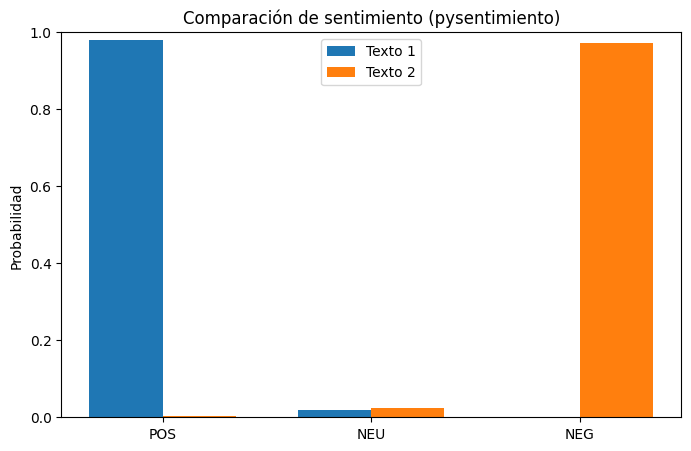

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["POS", "NEU", "NEG"]

probs1 = [res1.probas["POS"], res1.probas["NEU"], res1.probas["NEG"]]
probs2 = [res2.probas["POS"], res2.probas["NEU"], res2.probas["NEG"]]

x = np.arange(len(labels))  # posiciones
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, probs1, width, label='Texto 1')
plt.bar(x + width/2, probs2, width, label='Texto 2')

plt.xticks(x, labels)
plt.ylabel("Probabilidad")
plt.title("Comparación de sentimiento (pysentimiento)")
plt.legend()
plt.ylim(0,1)

plt.show()


### Pie charts de cada texto

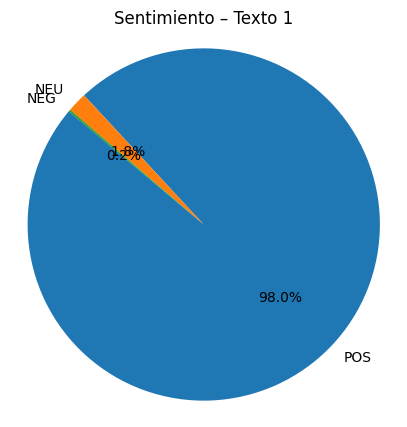

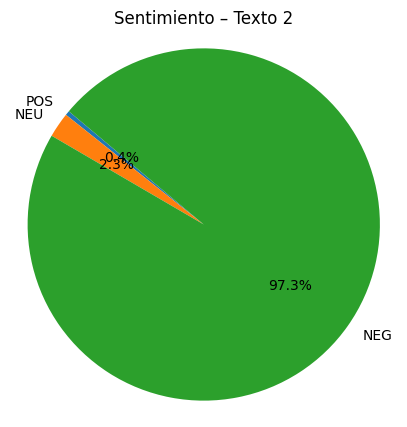

In [ ]:
def pie_sentimiento(result, titulo):
    labels = ["POS", "NEU", "NEG"]
    sizes = [result.probas["POS"], result.probas["NEU"], result.probas["NEG"]]

    plt.figure(figsize=(5,5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(titulo)
    plt.axis('equal')
    plt.show()

pie_sentimiento(res1, "Sentimiento – Texto 1")
pie_sentimiento(res2, "Sentimiento – Texto 2")


### # Pie Chart doble personalizado, más visual

- con colores específicos y 30% de transparencia (alpha=0.3)
- Cada radar chart por separado como figuras independientes.

    POS → verde bosque

    NEU → azul claro

    NEG → rojo burdeos

  




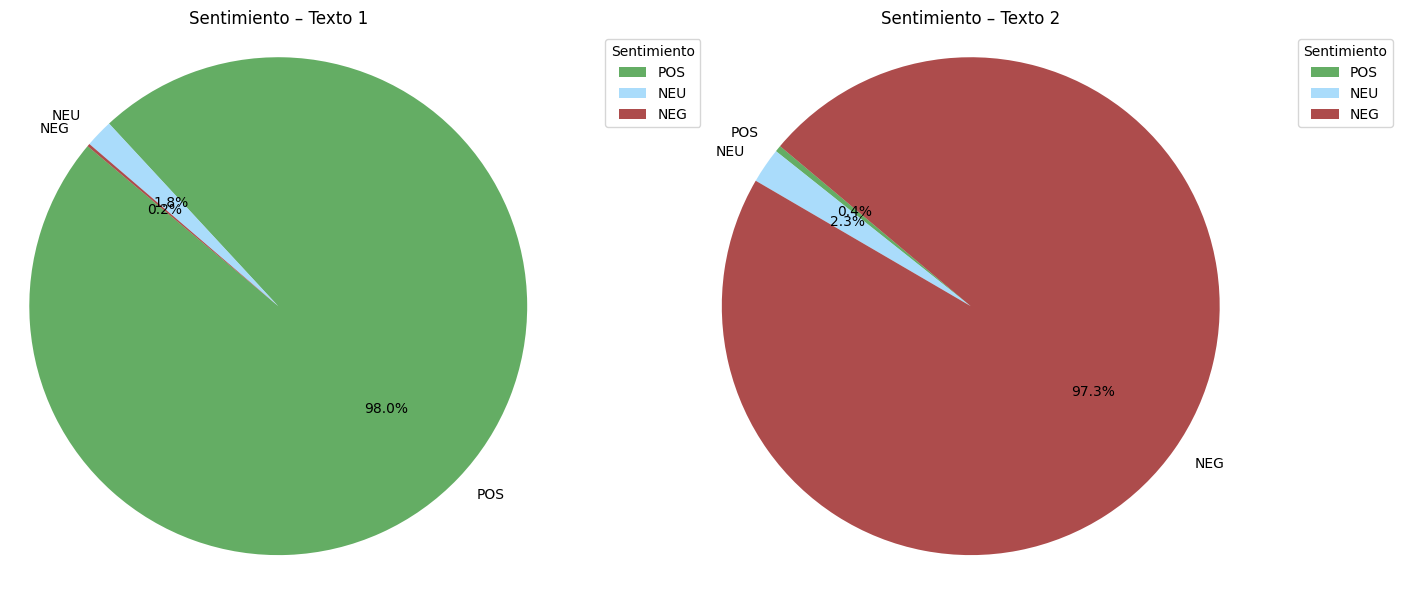

In [ ]:
# Los colores (forestgreen, lightskyblue, darkred) de tipo "semáforo"
colores = {
    "POS": "forestgreen",
    "NEU": "lightskyblue",
    "NEG": "darkred"
}

def pie_sentimiento_doble(result1, result2, titles=("Texto 1", "Texto 2")):
    labels = ["POS", "NEU", "NEG"]

    sizes1 = [result1.probas[l] for l in labels]
    sizes2 = [result2.probas[l] for l in labels]

    # Crear figura con 2 gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # -------- PIE 1 --------
    wedges1, texts1, autotexts1 = axes[0].pie(
        sizes1,
        labels=labels,
        colors=[colores[l] for l in labels],
        autopct=lambda pct: f"{pct:.1f}%",
        startangle=140,
        wedgeprops={'alpha': 0.7}  # % de transparencia
    )
    axes[0].set_title(titles[0])
    axes[0].axis('equal')

    # Leyenda externa
    axes[0].legend(wedges1, labels, title="Sentimiento", loc="upper right", bbox_to_anchor=(1.3, 1))

    # -------- PIE 2 --------
    wedges2, texts2, autotexts2 = axes[1].pie(
        sizes2,
        labels=labels,
        colors=[colores[l] for l in labels],
        autopct=lambda pct: f"{pct:.1f}%",
        startangle=140,
        wedgeprops={'alpha': 0.7}
    )
    axes[1].set_title(titles[1])
    axes[1].axis('equal')

    axes[1].legend(wedges2, labels, title="Sentimiento", loc="upper right", bbox_to_anchor=(1.3, 1))

    plt.tight_layout()
    plt.show()


# --- Llamar función ---
pie_sentimiento_doble(res1, res2, titles=("Sentimiento – Texto 1", "Sentimiento – Texto 2"))


### Radar Chart (para comparación multiclase)

Aquí de momento sólo tenems 3 clases / criterios analizados : "POS", "NEU", "NEG"

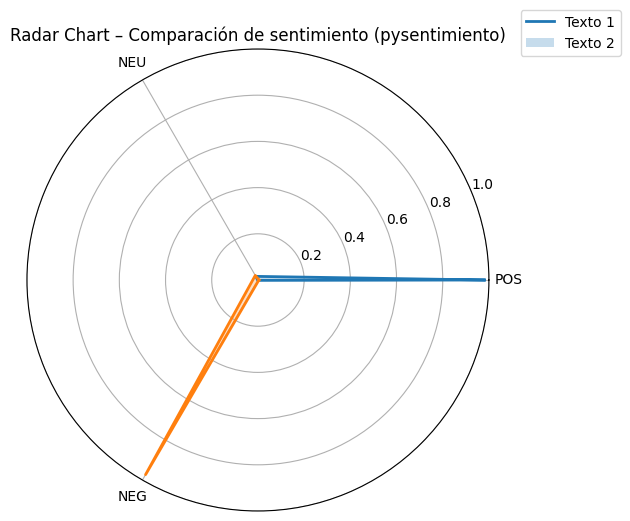

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def radar_chart(res1, res2, labels=["POS", "NEU", "NEG"]):
    # Probabilidades
    probs1 = [res1.probas[l] for l in labels]
    probs2 = [res2.probas[l] for l in labels]

    # Cerrar el círculo
    probs1 += probs1[:1]
    probs2 += probs2[:1]

    # Ángulos
    angles = np.linspace(0, 2 * np.pi, len(labels) + 1)

    # Radar
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw={"polar": True})

    ax.plot(angles, probs1, linewidth=2)
    ax.fill(angles, probs1, alpha=0.25)

    ax.plot(angles, probs2, linewidth=2)
    ax.fill(angles, probs2, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    ax.set_ylim(0, 1)
    ax.set_title("Radar Chart – Comparación de sentimiento (pysentimiento)")

    plt.legend(["Texto 1", "Texto 2"], loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.show()

radar_chart(res1, res2)


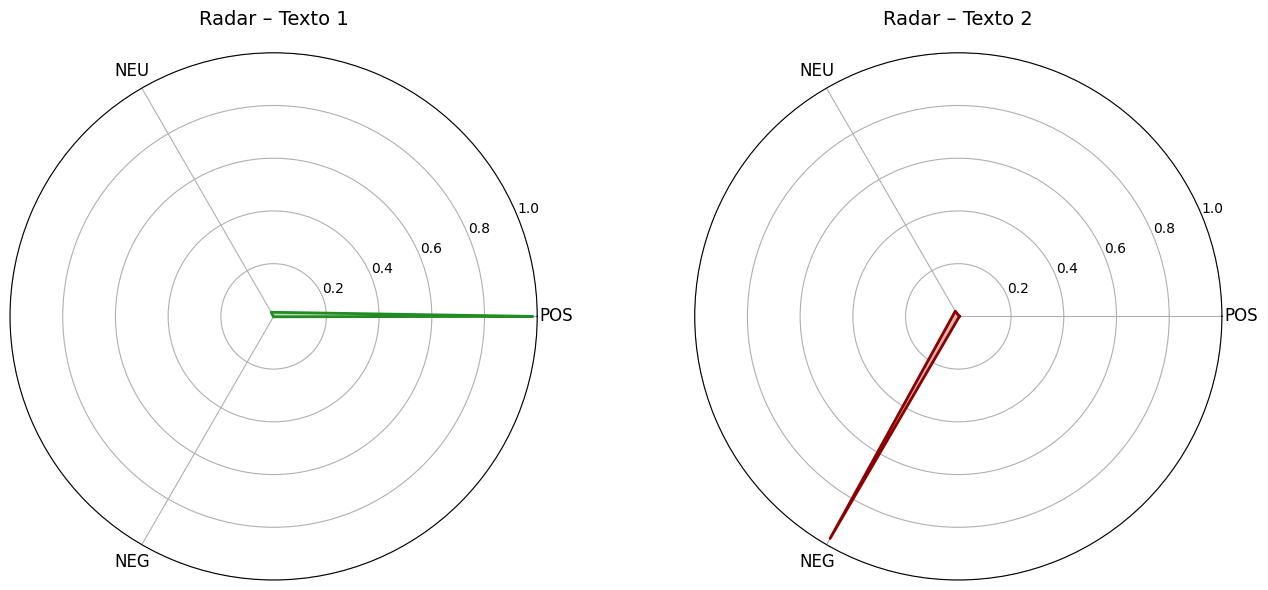

In [ ]:
# Mismos colores que en el radar
# (no haría falta redefinirlos !)

colores = {
    "POS": "forestgreen",
    "NEU": "lightskyblue",
    "NEG": "darkred"
}

def radar_chart_doble(result1, result2, titles=("Texto 1", "Texto 2"), labels=["POS", "NEU", "NEG"]):
    # Preparación de datos
    probs1 = [result1.probas[l] for l in labels] + [result1.probas[labels[0]]]
    probs2 = [result2.probas[l] for l in labels] + [result2.probas[labels[0]]]

    angles = np.linspace(0, 2*np.pi, len(labels) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(14,6), subplot_kw=dict(polar=True))

    # --- Gráfico 1 ---
    ax = axes[0]
    color1 = colores[result1.output]

    ax.plot(angles, probs1, linewidth=2, color=color1)
    ax.fill(angles, probs1, alpha=0.3, color=color1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_title(titles[0], fontsize=14, pad=20)

    # --- Gráfico 2 ---
    ax = axes[1]
    color2 = colores[result2.output]

    ax.plot(angles, probs2, linewidth=2, color=color2)
    ax.fill(angles, probs2, alpha=0.3, color=color2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_title(titles[1], fontsize=14, pad=20)

    plt.tight_layout()
    plt.show()


# --- Llamar función ---
radar_chart_doble(res1, res2, titles=("Radar – Texto 1", "Radar – Texto 2"))


### spaCy — modelo inglés o español

In [ ]:
nlp = spacy.load("en_core_web_sm")  # Si quieres español: es_core_news_sm

doc = nlp("The service was excellent and the food was delicious.")

[(token.text, token.pos_) for token in doc]


### Análisis sintáctico y dependencias

In [ ]:
from spacy import displacy

displacy.render(doc, style="dep", jupyter=True)


### Extracción de entidades con spaCy

In [ ]:
[(ent.text, ent.label_) for ent in doc.ents]


### Comparación entre textos (similitud)

In [ ]:
doc1 = nlp(texto1)
doc2 = nlp(texto2)

doc1.similarity(doc2)


NameError: name 'nlp' is not defined

## Conclusiones

Hemos visto cómo convertir texto en datos, cómo limpiarlo, visualizarlo y analizar su sentimiento.  
También vimos cómo las máquinas interpretan la estructura del lenguaje.

Este cuaderno muestra un flujo básico para análisis exploratorio de texto:  
desde tokenización y frecuencias hasta sentimiento y relaciones entre textos.

Estos métodos son útiles para:
- reseñas  
- encuestas abiertas  
- análisis de redes sociales  
- análisis de artículos o noticias  
- comparaciones entre documentos  
